In [318]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,8]
from  sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
import geopandas
import umap

In [229]:
df = pd.read_csv('raw_data.csv')
df = df.dropna(axis = 0, how = 'all')

In [230]:
df.head()

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,KFF - Custom State Reports
NaN,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Dist. of Columbia,Florida,Georgia,Hawaii,Idaho,Illinois,Iowa,Indiana,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin
Medicaid,19.5%,21.3%,21.0%,26.2%,25.3%,16.8%,21.5%,20.4%,25.5%,17.4%,17.3%,17.6%,15.6%,18.2%,19.5%,17.7%,13.9%,25.5%,29.3%,20.0%,18.7%,22.1%,21.7%,16.9%,24.2%,14.4%,20.8%,12.6%,17.8%,13.2%,16.6%,32.7%,25.7%,17.9%,12.2%,20.0%,17.0%,20.8%,20.2%,20.5%,18.8%,12.8%,19.5%,15.9%,9.3%,23.9%,13.5%,19.8%,26.6%,16.1%
Medicare,16.0%,10.0%,16.1%,15.9%,11.4%,12.8%,14.1%,17.3%,8.2%,18.0%,12.6%,15.9%,15.0%,14.1%,15.6%,14.8%,15.0%,15.8%,13.7%,18.3%,13.3%,13.1%,15.9%,14.7%,14.2%,16.4%,18.1%,14.2%,14.0%,17.7%,13.8%,15.0%,13.0%,15.3%,13.8%,15.9%,15.1%,16.2%,16.3%,14.6%,16.8%,16.1%,15.0%,10.9%,10.0%,17.5%,14.8%,13.9%,19.0%,15.5%
Uninsured,9.7%,11.5%,11.1%,9.1%,7.8%,7.8%,5.9%,6.6%,3.6%,13.1%,13.4%,4.1%,10.5%,7.3%,4.7%,8.8%,9.2%,6.4%,8.9%,8.1%,5.9%,3.0%,5.8%,4.8%,12.9%,10.1%,8.3%,7.9%,11.5%,6.4%,7.9%,9.8%,5.3%,11.4%,7.4%,6.7%,14.9%,7.1%,5.7%,4.3%,10.8%,9.6%,10.2%,18.4%,9.6%,4.4%,8.0%,6.6%,6.6%,5.8%
Medicaid,146%,205%,161%,214%,213%,200%,263%,217%,324%,196%,225%,196%,138%,213%,380%,213%,171%,200%,138%,214%,264%,205%,200%,283%,199%,201%,162%,199%,165%,201%,199%,255%,223%,201%,162%,205%,138%,190%,220%,195%,199%,138%,200%,203%,144%,213%,148%,198%,190%,306%


In [231]:
df = df.transpose()
df = df.reset_index(drop = True)

In [232]:
#reset wonky indexing
df2 = df.columns.to_frame()
df2 = df2.transpose()
df2.columns = df2.iloc[0]
df2.drop(axis = 1, index = 0, inplace = True)
df2.drop(columns = ['Unborn Child Option (CHIP-Funded)'], inplace= True)
df2.head()

,NaN,Medicaid,Medicare,Uninsured,Medicaid,Medicare Beneficiaries as a Share of Total Population,Abortion Rate,Total Health Spending,Expenses per Inpatient Day,Employee Contribution,...,Asian,American Indian/Alaska Native,Multiple Races,Total,Total,Median Annual Household Income,Governor Political Affiliation,State Senate Majority Political Affiliation,State House Majority Political Affiliation,Unemployed
1,Alabama,19.5%,16.0%,9.7%,146%,21%,6.8,"$35,263","$1,657.36","$1,676",...,1.4%,0.4%,1.9%,100.0%,14.8%,"$51,734",Republican,Republican,Republican,3.3%
2,Alaska,21.3%,10.0%,11.5%,205%,13%,8.8,"$8,151","$2,397.02","$1,334",...,6.0%,15.1%,8.3%,100.0%,10.1%,"$75,463",Republican,Republican,Republican,6.6%
3,Arizona,21.0%,16.1%,11.1%,161%,18%,9.0,"$43,356","$2,751.38","$1,554",...,3.3%,3.9%,2.4%,100.0%,12.6%,"$62,055",Republican,Republican,Republican,6.8%
4,Arkansas,26.2%,15.9%,9.1%,214%,21%,5.3,"$21,980","$1,882.51","$1,470",...,1.6%,0.6%,2.4%,100.0%,15.6%,"$48,952",Republican,Republican,Republican,4.4%
5,California,25.3%,11.4%,7.8%,213%,16%,NR,"$291,989","$3,726.43","$1,242",...,14.7%,0.4%,3.3%,100.0%,10.6%,"$80,440",Democrat,Democrat,Democrat,7.7%


In [233]:
#wyoming data loaded seperately
wyoming = pd.read_csv('wyoming.csv')
wyoming.dropna(axis = 0, how = 'all', inplace = True)
wyoming = wyoming.transpose()
wyoming.reset_index(drop = True, inplace = True)

In [234]:
#wisconsin data loaded separately
wisconsin = pd.read_csv('wisconsin.csv')
wisconsin.dropna(axis = 0, how = 'all', inplace = True)
wisconsin = wisconsin.transpose()
wisconsin.reset_index(drop = True, inplace = True)

In [235]:
final_df = pd.concat([df2, wisconsin,wyoming], ignore_index = True)

In [236]:
new_col_names = ['State',
 'Medicaid',
 'Medicare',
 'Uninsured',
 'Pregnant_Medicaid_Limit',
 'Medicare_Beneficiaries_in_Population',
 'Abortion_Rate',
 'Total_Health_Spending',
 'Expenses_per_Inpatient_Day',
 'Employee_Contribution',
 'No_Personal_Doctor',
 'White',
 'Black',
 'Hispanic',
 'Asian',
 'AIAN',
 'Multiple_Races',
 'Total_Population',
 'Poverty_Rate',
 'Median_Annual_Household_Income',
 'Governor_Political_Affiliation',
 'State_Senate_Majority_Political_Affiliation',
 'State_House_Majority_Political_Affiliation',
 'Unemployed']

In [237]:
final_df.columns = new_col_names
#drop columns we don't want
final_df.drop(columns = ['Total_Population', 'Medicare_Beneficiaries_in_Population', 'Employee_Contribution', 'White'], inplace = True)
final_df.head()

,State,Medicaid,Medicare,Uninsured,Pregnant_Medicaid_Limit,Abortion_Rate,Total_Health_Spending,Expenses_per_Inpatient_Day,No_Personal_Doctor,Black,Hispanic,Asian,AIAN,Multiple_Races,Poverty_Rate,Median_Annual_Household_Income,Governor_Political_Affiliation,State_Senate_Majority_Political_Affiliation,State_House_Majority_Political_Affiliation,Unemployed
0,Alabama,19.5%,16.0%,9.7%,146%,6.8,"$35,263","$1,657.36",16.6%,26.5%,4.4%,1.4%,0.4%,1.9%,14.8%,"$51,734",Republican,Republican,Republican,3.3%
1,Alaska,21.3%,10.0%,11.5%,205%,8.8,"$8,151","$2,397.02",30.6%,2.2%,7.0%,6.0%,15.1%,8.3%,10.1%,"$75,463",Republican,Republican,Republican,6.6%
2,Arizona,21.0%,16.1%,11.1%,161%,9.0,"$43,356","$2,751.38",23.8%,4.3%,31.8%,3.3%,3.9%,2.4%,12.6%,"$62,055",Republican,Republican,Republican,6.8%
3,Arkansas,26.2%,15.9%,9.1%,214%,5.3,"$21,980","$1,882.51",17.9%,15.2%,7.8%,1.6%,0.6%,2.4%,15.6%,"$48,952",Republican,Republican,Republican,4.4%
4,California,25.3%,11.4%,7.8%,213%,NR,"$291,989","$3,726.43",23.5%,5.3%,39.5%,14.7%,0.4%,3.3%,10.6%,"$80,440",Democrat,Democrat,Democrat,7.7%


In [238]:
#columns currently represented as percents
percent_cols = ['Medicaid', 'Medicare', 'Uninsured', 'Pregnant_Medicaid_Limit', 'No_Personal_Doctor', 
                'Black', 'Hispanic', 'Asian', 'AIAN', 'Multiple_Races', 'Poverty_Rate',
                'Unemployed']
#columns currently represented as dollars
dollar_cols = ['Total_Health_Spending', 'Expenses_per_Inpatient_Day', 'Median_Annual_Household_Income']
                

In [239]:
for pc in percent_cols:
    final_df[pc] = final_df[pc].str.rstrip('%').astype('float') / 100.0

In [240]:
for dol in dollar_cols:
    col_stripped = final_df[dol].str.lstrip('$')
    new_col = []
    for item in col_stripped:
        new_col.append(float(item.replace(',', '')))
    final_df[dol] = new_col

In [241]:
final_df.head()

,State,Medicaid,Medicare,Uninsured,Pregnant_Medicaid_Limit,Abortion_Rate,Total_Health_Spending,Expenses_per_Inpatient_Day,No_Personal_Doctor,Black,Hispanic,Asian,AIAN,Multiple_Races,Poverty_Rate,Median_Annual_Household_Income,Governor_Political_Affiliation,State_Senate_Majority_Political_Affiliation,State_House_Majority_Political_Affiliation,Unemployed
0,Alabama,0.195,0.160,0.097,1.46,6.8,35263.0,1657.36,0.166,0.265,0.044,0.014,0.004,0.019,0.148,51734.0,Republican,Republican,Republican,0.033
1,Alaska,0.213,0.100,0.115,2.05,8.8,8151.0,2397.02,0.306,0.022,0.070,0.060,0.151,0.083,0.101,75463.0,Republican,Republican,Republican,0.066
2,Arizona,0.210,0.161,0.111,1.61,9.0,43356.0,2751.38,0.238,0.043,0.318,0.033,0.039,0.024,0.126,62055.0,Republican,Republican,Republican,0.068
3,Arkansas,0.262,0.159,0.091,2.14,5.3,21980.0,1882.51,0.179,0.152,0.078,0.016,0.006,0.024,0.156,48952.0,Republican,Republican,Republican,0.044
4,California,0.253,0.114,0.078,2.13,NR,291989.0,3726.43,0.235,0.053,0.395,0.147,0.004,0.033,0.106,80440.0,Democrat,Democrat,Democrat,0.077


In [242]:
mmr_data = pd.read_csv('csvData.csv')
mmr_data.rename(columns = {'maternalMortalityRate': 'maternal_mortality_rate'}, inplace = True)
mmr_data.sort_values('State', inplace = True)
mmr_data.head()

,State,maternal_mortality_rate
44,Alabama,36.4
9,Alaska,12.4
40,Arizona,27.3
45,Arkansas,37.5
3,California,4.0


In [243]:
merged_df = pd.merge(final_df, mmr_data, on = 'State')
merged_df.dropna(inplace = True)
merged_df.tail()

,State,Medicaid,Medicare,Uninsured,Pregnant_Medicaid_Limit,Abortion_Rate,Total_Health_Spending,Expenses_per_Inpatient_Day,No_Personal_Doctor,Black,...,Asian,AIAN,Multiple_Races,Poverty_Rate,Median_Annual_Household_Income,Governor_Political_Affiliation,State_Senate_Majority_Political_Affiliation,State_House_Majority_Political_Affiliation,Unemployed,maternal_mortality_rate
45,Virginia,0.135,0.148,0.080,1.48,9.8,62847.0,2180.50,0.202,0.189,...,0.067,0.002,0.033,0.093,76456.0,Democrat,Democrat,Democrat,0.043,20.0
46,Washington,0.198,0.139,0.066,1.98,11.5,55819.0,3674.39,0.208,0.038,...,0.089,0.011,0.050,0.094,78687.0,Democrat,Democrat,Democrat,0.052,13.8
47,West Virginia,0.266,0.190,0.066,1.90,4.7,17491.0,1830.93,0.154,0.032,...,0.008,0.002,0.018,0.164,48850.0,Republican,Republican,Republican,0.053,12.9
48,Wisconsin,0.161,0.155,0.058,3.06,6.0,50109.0,2558.29,0.145,0.062,...,0.030,0.007,0.020,0.095,64168.0,Democrat,Republican,Republican,0.039,13.7
49,Wyoming,0.115,0.162,0.123,1.59,0.3,4856.0,1382.85,0.270,0.010,...,0.006,0.022,0.021,0.105,65003.0,Republican,Republican,Republican,0.054,26.3


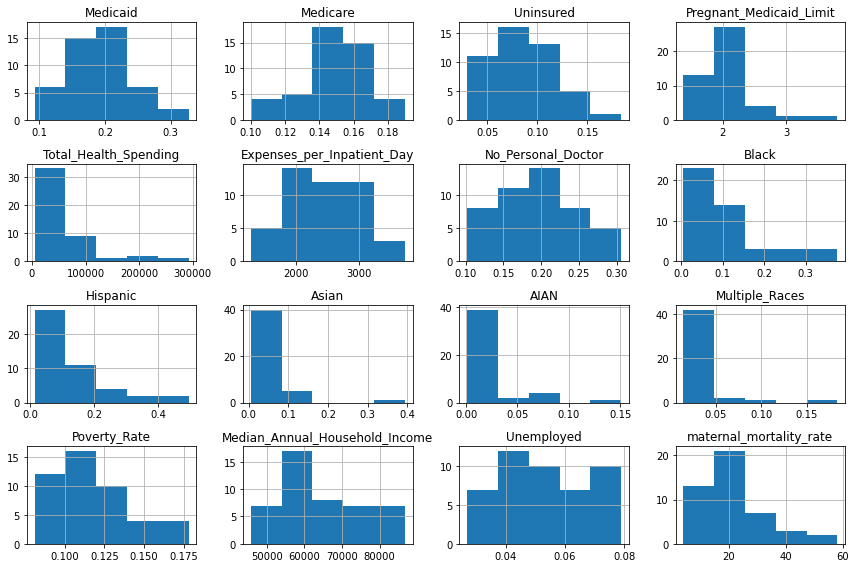

In [244]:
merged_df.hist(bins = 5)
plt.tight_layout()
plt.show()

In [245]:
list_cols = ['Governor_Political_Affiliation', 
                               'State_Senate_Majority_Political_Affiliation', 
                               'State_House_Majority_Political_Affiliation']
for col in list_cols:
    merged_df[col] = [0 if item == 'Republican' else 1 for item in merged_df[col]]
merged_df.head()

,State,Medicaid,Medicare,Uninsured,Pregnant_Medicaid_Limit,Abortion_Rate,Total_Health_Spending,Expenses_per_Inpatient_Day,No_Personal_Doctor,Black,...,Asian,AIAN,Multiple_Races,Poverty_Rate,Median_Annual_Household_Income,Governor_Political_Affiliation,State_Senate_Majority_Political_Affiliation,State_House_Majority_Political_Affiliation,Unemployed,maternal_mortality_rate
0,Alabama,0.195,0.160,0.097,1.46,6.8,35263.0,1657.36,0.166,0.265,...,0.014,0.004,0.019,0.148,51734.0,0,0,0,0.033,36.4
1,Alaska,0.213,0.100,0.115,2.05,8.8,8151.0,2397.02,0.306,0.022,...,0.060,0.151,0.083,0.101,75463.0,0,0,0,0.066,12.4
2,Arizona,0.210,0.161,0.111,1.61,9.0,43356.0,2751.38,0.238,0.043,...,0.033,0.039,0.024,0.126,62055.0,0,0,0,0.068,27.3
3,Arkansas,0.262,0.159,0.091,2.14,5.3,21980.0,1882.51,0.179,0.152,...,0.016,0.006,0.024,0.156,48952.0,0,0,0,0.044,37.5
4,California,0.253,0.114,0.078,2.13,NR,291989.0,3726.43,0.235,0.053,...,0.147,0.004,0.033,0.106,80440.0,1,1,1,0.077,4.0


In [246]:
for index, value in merged_df['Abortion_Rate'].items():
    if value == 'NR':
        merged_df.loc[index, 'Abortion_Rate'] = 11.4
merged_df['Abortion_Rate'] = merged_df['Abortion_Rate'].astype('float64')

merged_df['AIAN'] = merged_df['AIAN'].fillna(0)

In [247]:
predictors  = merged_df.drop(columns = ['State', 'maternal_mortality_rate']).columns

<AxesSubplot:>

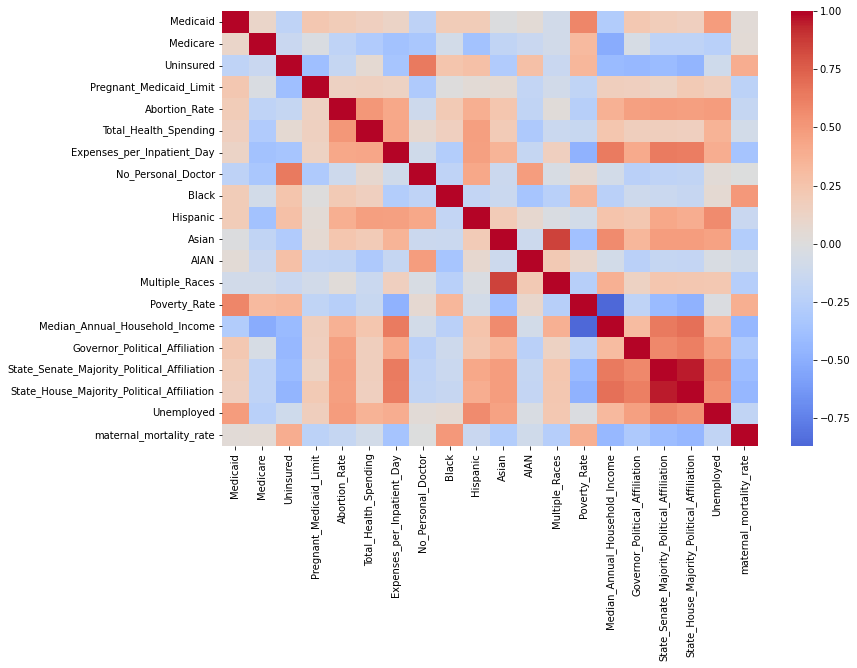

In [248]:
sns.heatmap(merged_df.drop(columns = ['State']).corr(), center=0, cmap='coolwarm')

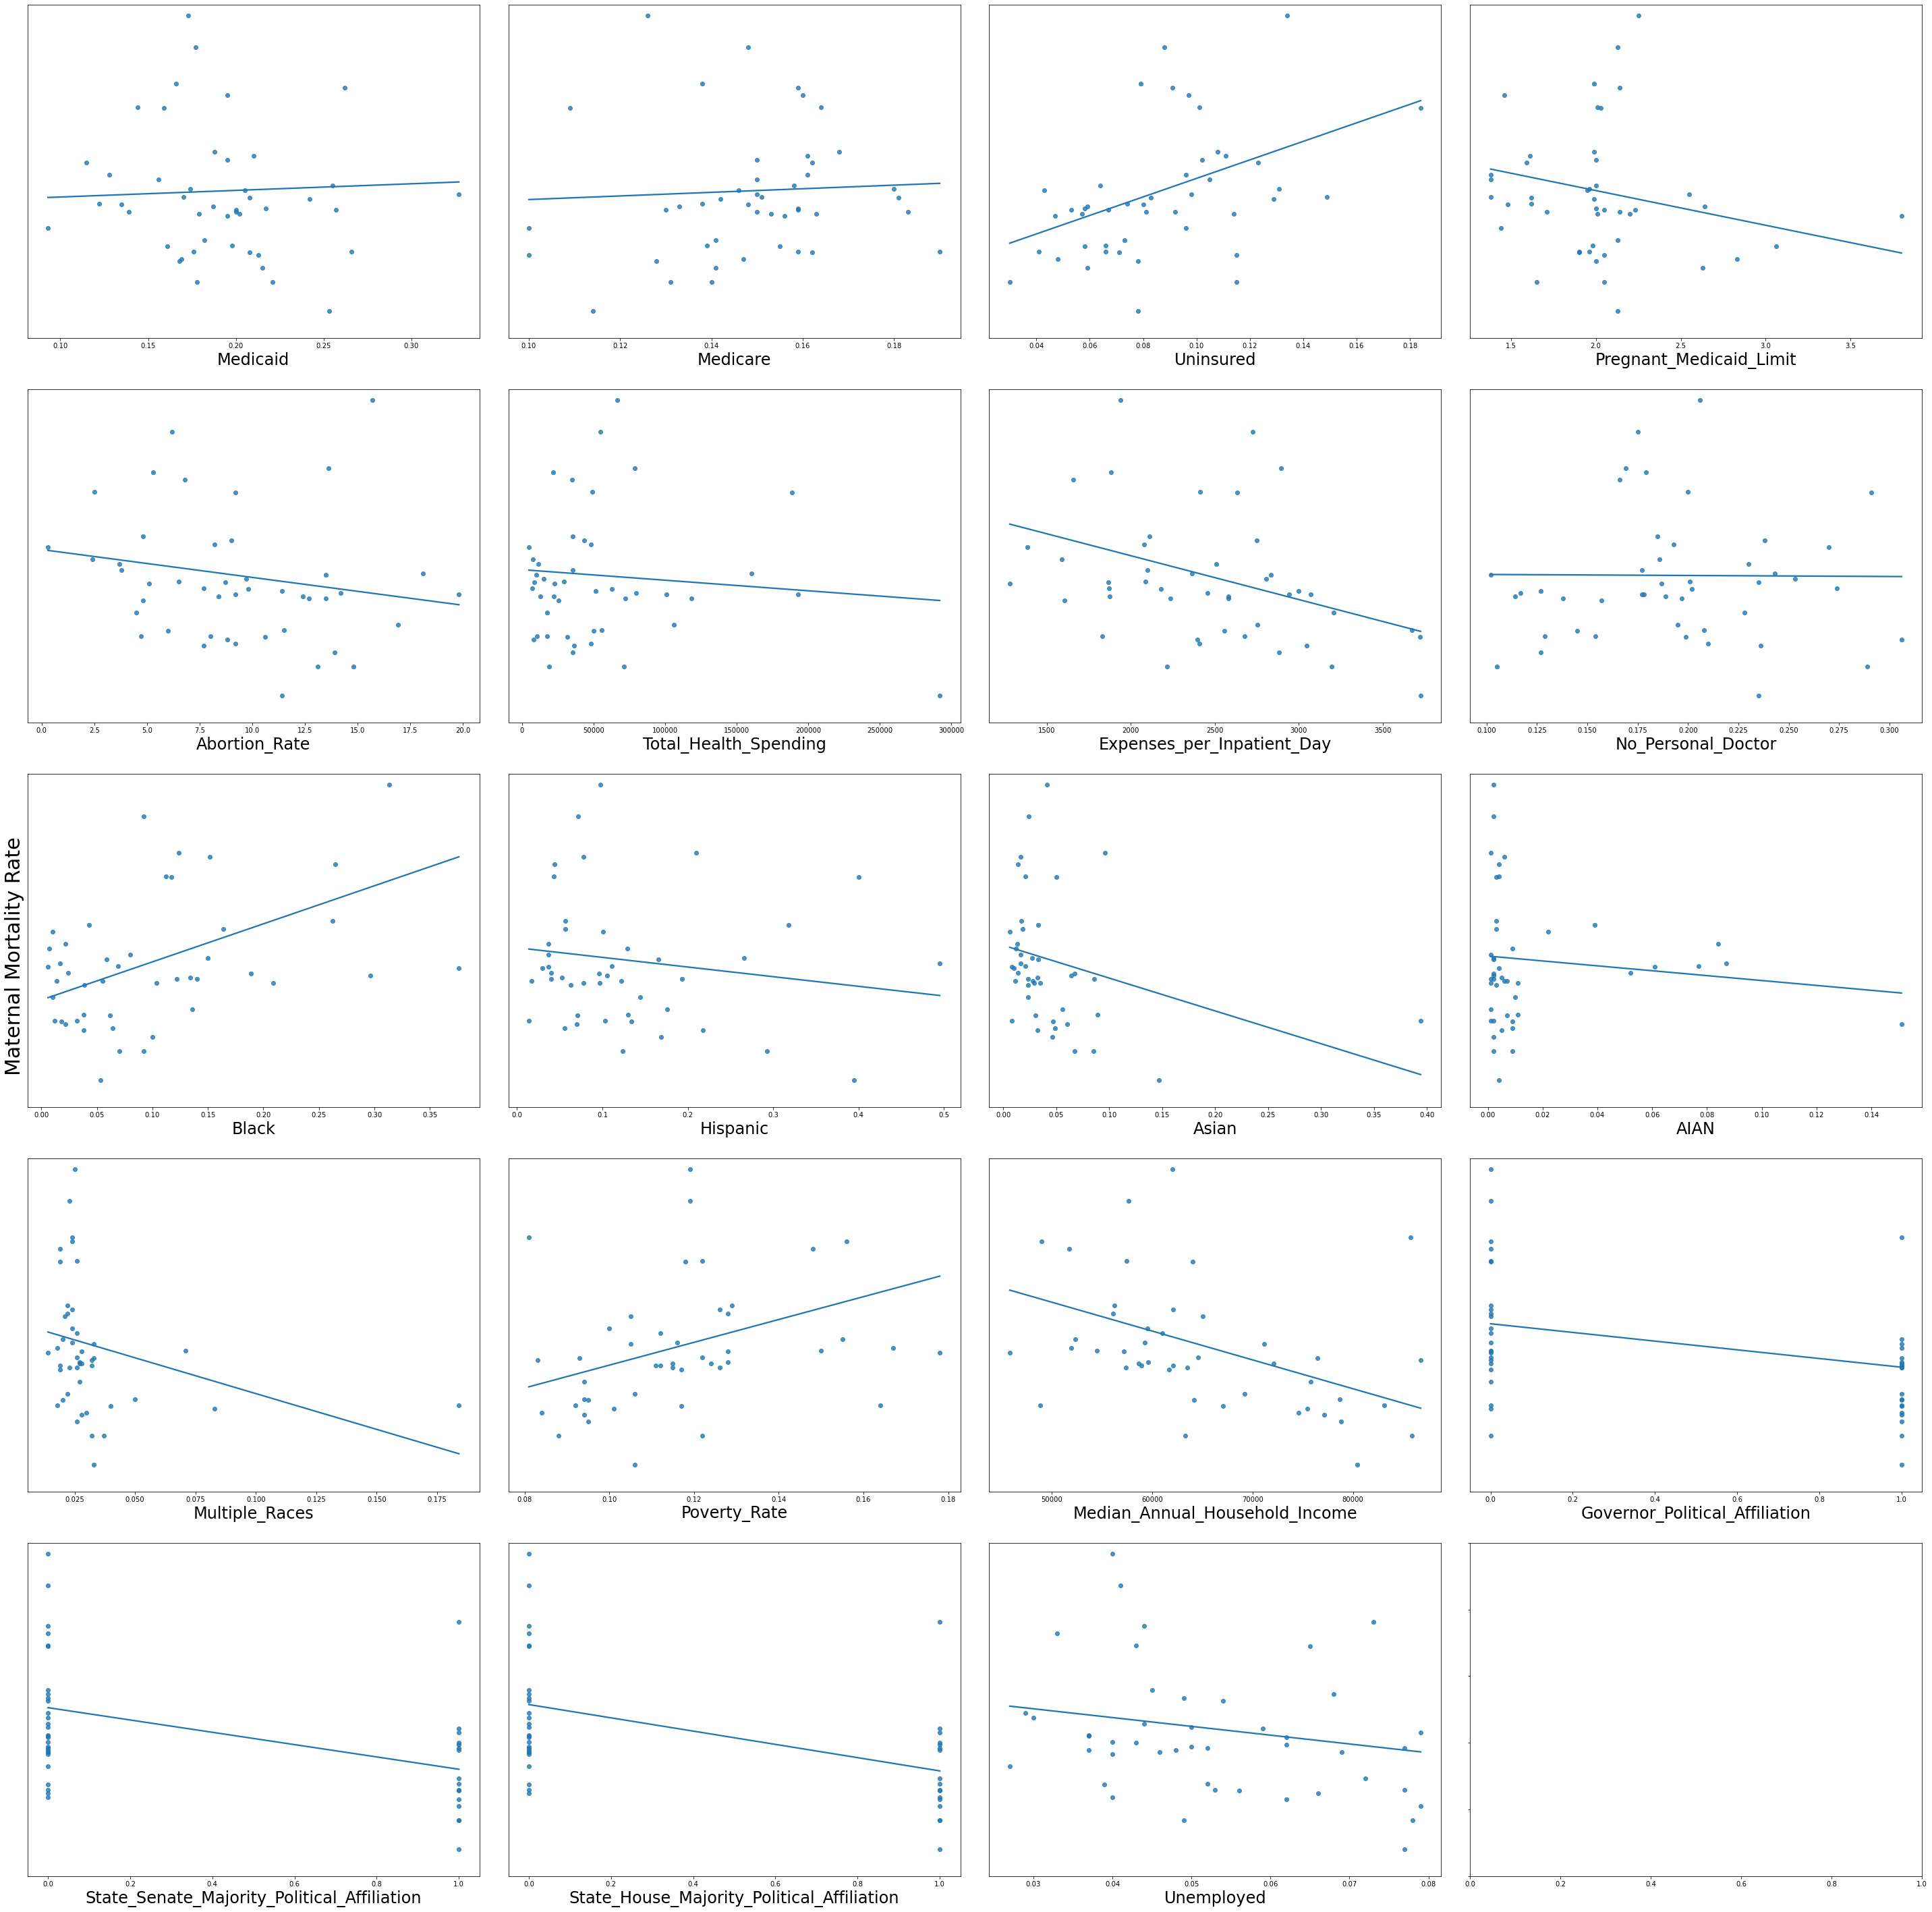

In [264]:
fig, ax = plt.subplots(5,4, figsize = (40,40), sharey = True)
for i, ax in zip(range(19), ax.flat):
    sns.regplot(x = predictors[i], y = 'maternal_mortality_rate', data = merged_df, ax = ax, ci = None)
    ax.set_xlabel(predictors[i], fontsize = 24)
    ax.set_ylim([0,50])
    ax.axes.yaxis.set_visible(False)
plt.tight_layout(pad = 3)
fig.text(0, 0.5, 'Maternal Mortality Rate', va='center', rotation='vertical', fontsize = 30);

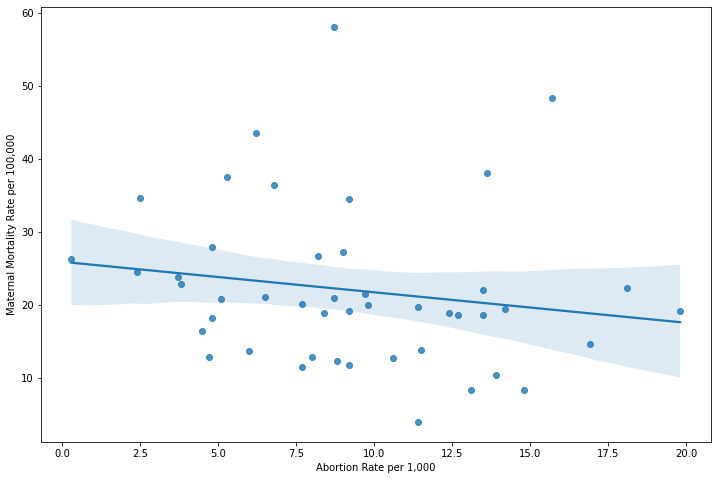

In [250]:
sns.regplot(x = 'Abortion_Rate', y = 'maternal_mortality_rate', data = merged_df);
plt.xlabel('Abortion Rate per 1,000');
plt.ylabel('Maternal Mortality Rate per 100,000');

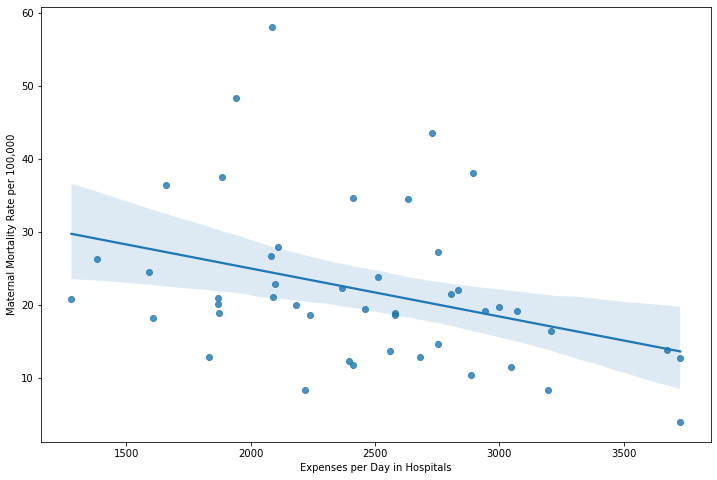

In [251]:
sns.regplot(x = 'Expenses_per_Inpatient_Day', y = 'maternal_mortality_rate', data = merged_df);
plt.xlabel('Expenses per Day in Hospitals');
plt.ylabel('Maternal Mortality Rate per 100,000');

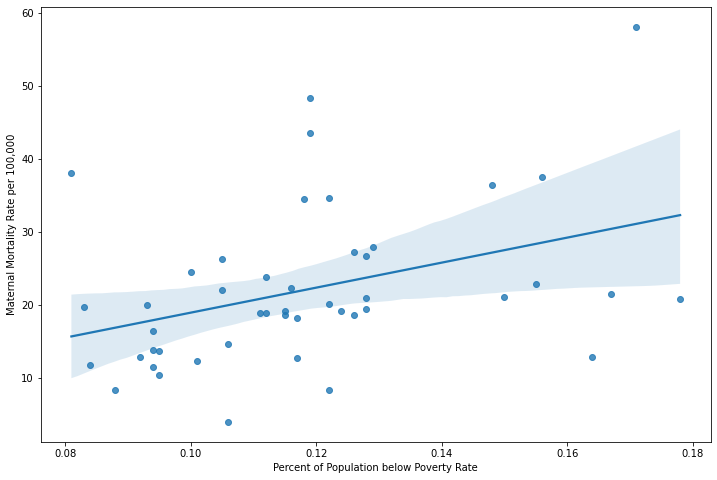

In [252]:
sns.regplot(x = 'Poverty_Rate', y = 'maternal_mortality_rate', data = merged_df);
plt.xlabel('Percent of Population below Poverty Rate');
plt.ylabel('Maternal Mortality Rate per 100,000');

In [253]:
merged_df['maternal_mortality_rate'].corr(merged_df['Poverty_Rate'])

0.38213103143482435

In [383]:
#get high correlations
high_corrs = []
for col in merged_df[predictors]:
    correlation = merged_df[col].corr(merged_df['maternal_mortality_rate'])
    if np.abs(correlation)  >= 0.4:
        high_corrs.append(col)
high_corrs

['Black',
 'Median_Annual_Household_Income',
 'State_Senate_Majority_Political_Affiliation',
 'State_House_Majority_Political_Affiliation']

In [310]:
lr = LinearRegression().fit(merged_df[predictors], merged_df['maternal_mortality_rate'])
lr.score(merged_df[predictors], merged_df['maternal_mortality_rate'])

0.5294737141931263

In [298]:
lr2 = LinearRegression().fit(merged_df[high_corrs], merged_df['maternal_mortality_rate'])
lr2.score(merged_df[high_corrs], merged_df['maternal_mortality_rate'])

0.4182472682958174

In [257]:
df_us = geopandas.read_file('cb_2018_us_state_500k/cb_2018_us_state_500k.shp')
df_us = df_us[~df_us.STUSPS.isin(['AK','HI', 'AA', 'AE','AP','PR','RI','VI'])]
df_us.rename(columns = {'NAME':'State'}, inplace = True)
df_us.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,State,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."


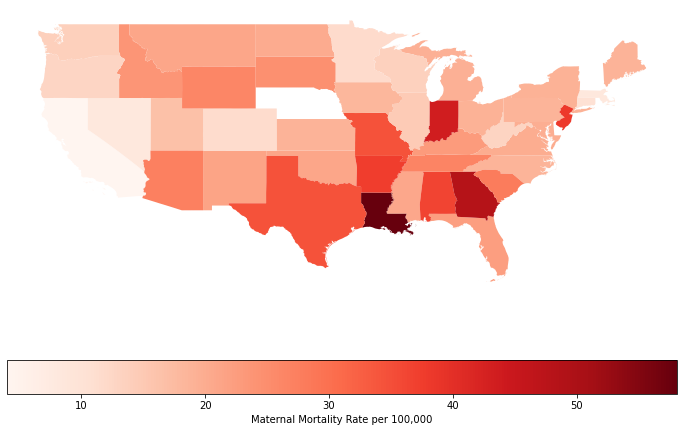

In [258]:
merged_states = df_us.merge(merged_df, on = 'State')
merged_states.plot(column = 'maternal_mortality_rate', legend = True, legend_kwds={'label': "Maternal Mortality Rate per 100,000",
                        'orientation': "horizontal"}, cmap = 'Reds');
plt.axis('off');

In [312]:
lr_merged = LinearRegression().fit(merged_states[predictors], merged_states['maternal_mortality_rate'])
preds = lr_merged.predict(merged_states[predictors])
merged_states['predicted_rates'] = preds

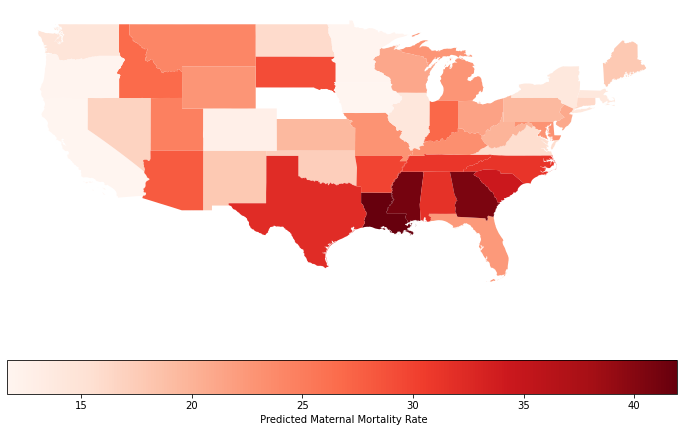

In [316]:
merged_states.plot(column = 'predicted_rates', legend = True, legend_kwds={'label': " Predicted Maternal Mortality Rate",
                        'orientation': "horizontal"}, cmap = 'Reds');
plt.axis('off');

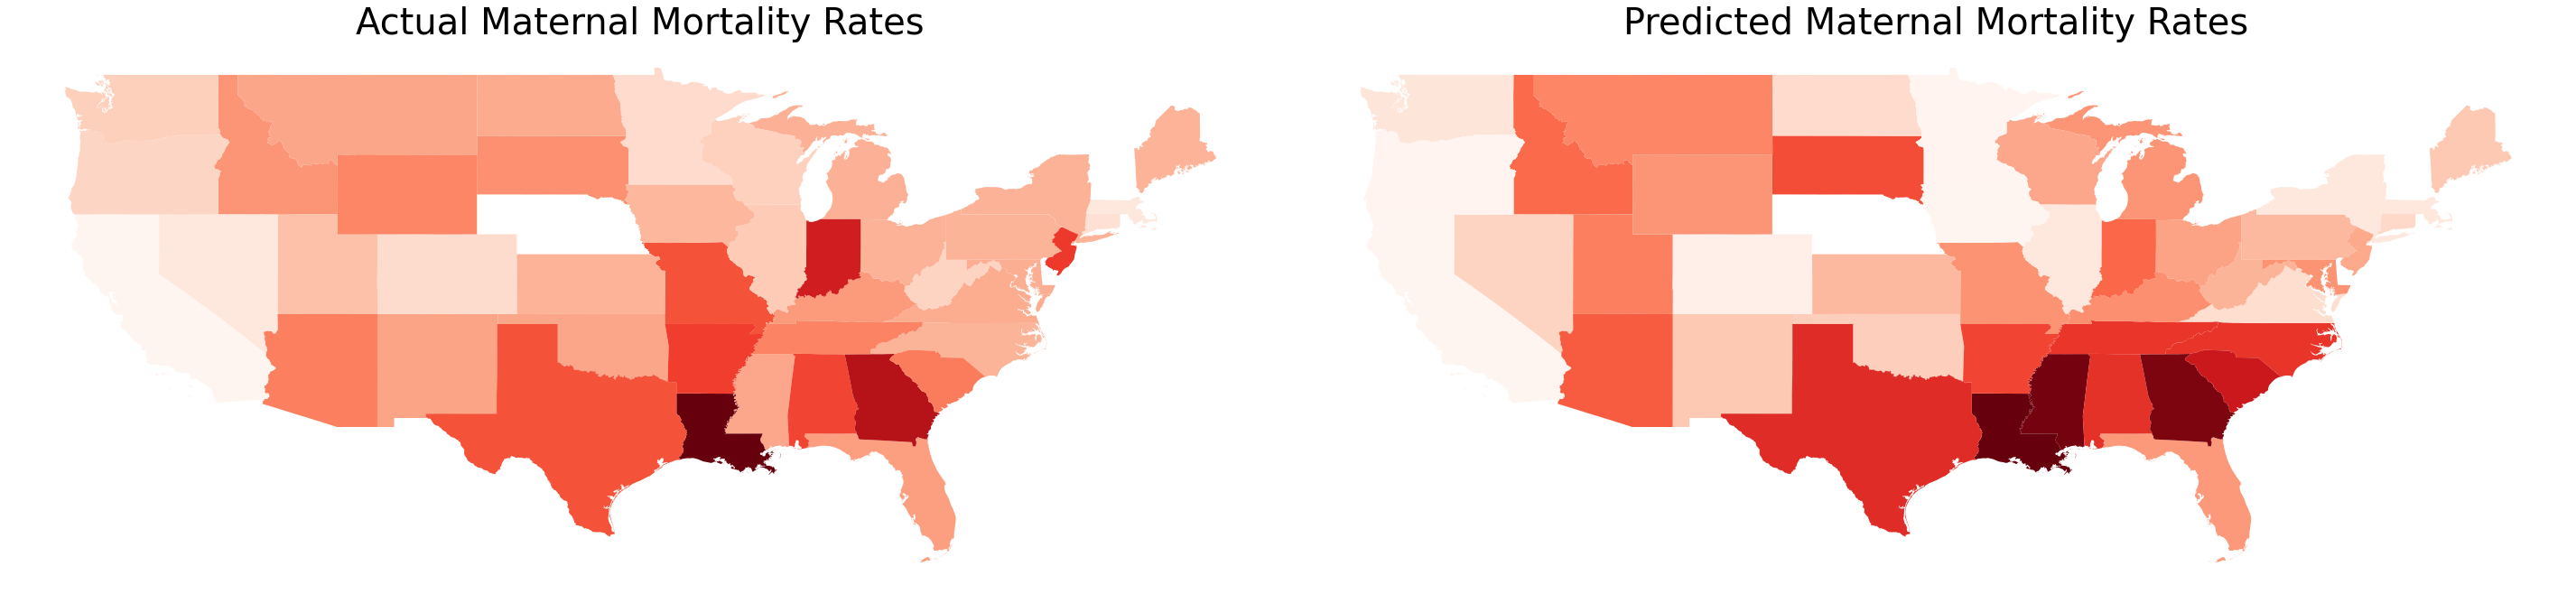

In [380]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(40, 60))
actual = merged_states.plot(column = 'maternal_mortality_rate', cmap = 'Reds', ax = ax1);
ax1.set_title('Actual Maternal Mortality Rates', fontsize = 40)
pred = merged_states.plot(column = 'predicted_rates', cmap = 'Reds', ax = ax2);
ax2.set_title('Predicted Maternal Mortality Rates', fontsize = 40)
plt.tight_layout()
ax1.axis('off')
ax2.axis('off')
plt.show()

In [ ]:
cmaps = ['Reds', 'Oranges', 'Greens', 'Blues', 'Purples']
columns = ['Black','Hispanic','Asian','AIAN', 'Multiple_Races']

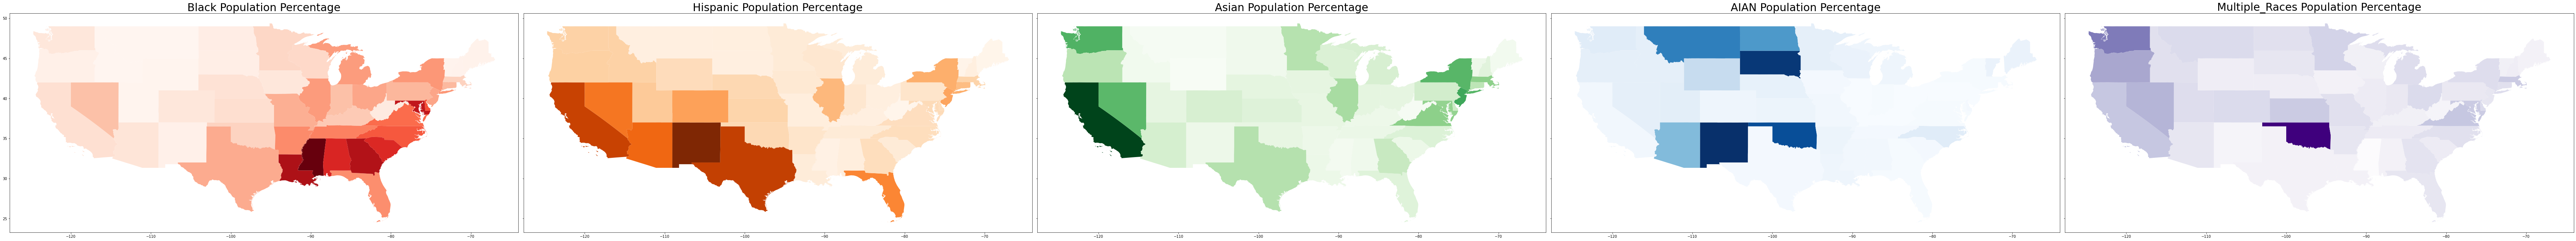

In [268]:
fig, ax = plt.subplots(1,5, figsize = (100,70), sharey = True)
for i, ax in zip(range(5), ax.flat):
    merged_final.plot(column = columns[i], cmap = cmaps[i], ax=ax);
    ax.set_title(columns[i] + ' Population Percentage', fontsize = 30)
plt.tight_layout()

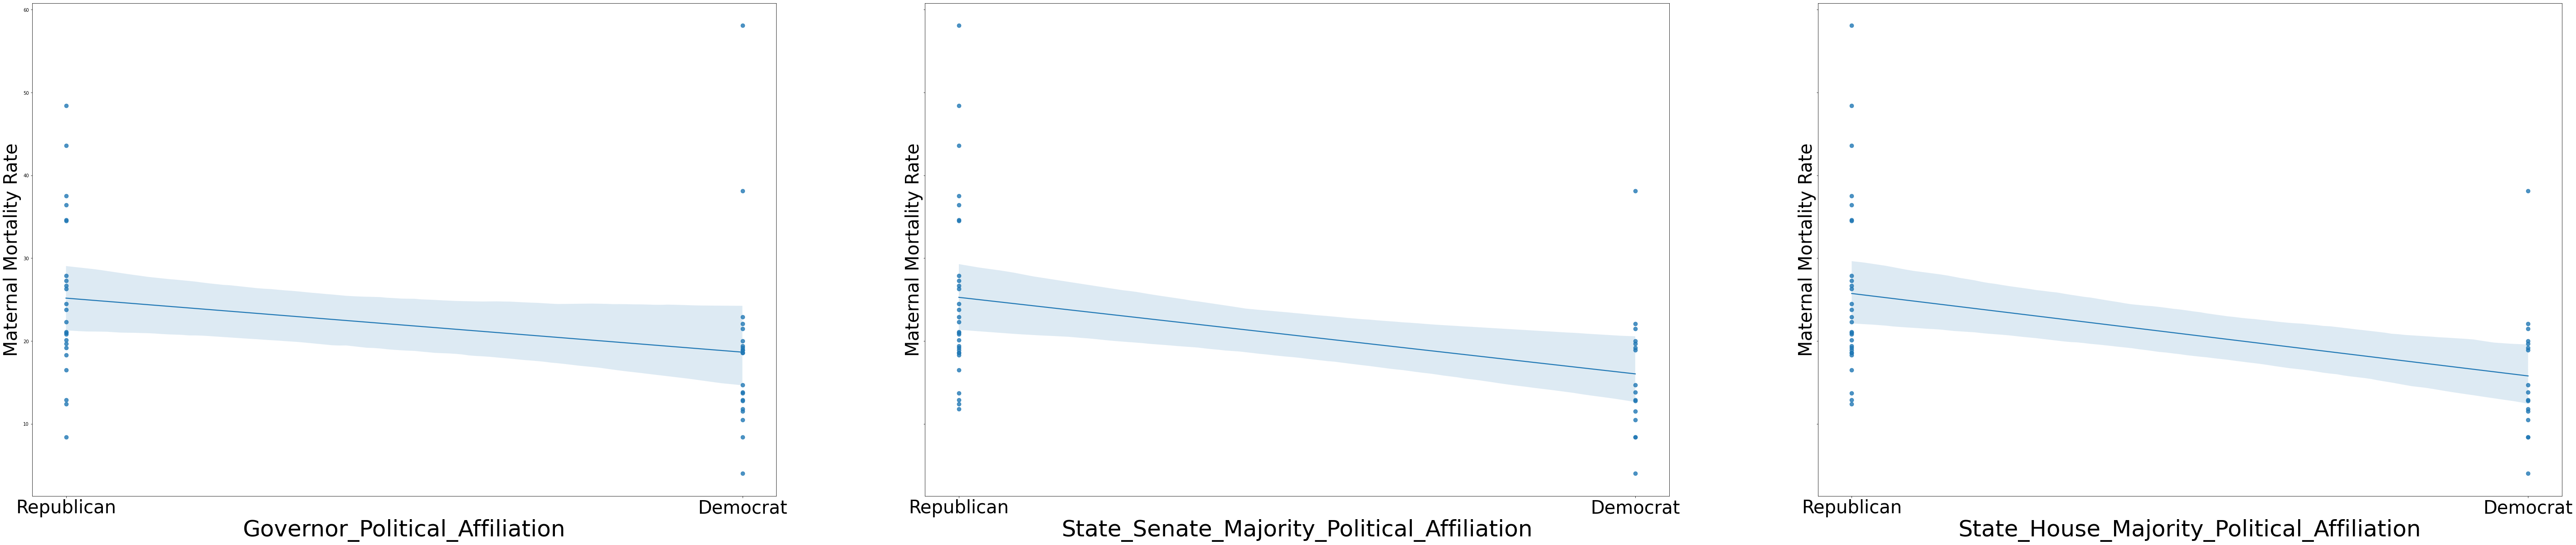

In [292]:
political_cols = ['Governor_Political_Affiliation',
 'State_Senate_Majority_Political_Affiliation',
 'State_House_Majority_Political_Affiliation']
fig, ax = plt.subplots(1,3, figsize = (100, 20), sharey = True)
for i, ax in zip(range(3), ax.flat):
    sns.regplot(x = political_cols[i], y = 'maternal_mortality_rate', data = merged_df, ax=ax, scatter_kws={'s':75});
    ax.set_xticks([0.0, 1.0])
    ax.set_xticklabels(labels = ['Republican', 'Democrat'], fontsize = 40)
    ax.set_xlabel(political_cols[i], fontsize = 50)
    ax.set_ylabel('Maternal Mortality Rate', fontsize = 40)

In [295]:
group_party = merged_df.groupby(by = 'Governor_Political_Affiliation')
group_party['maternal_mortality_rate'].mean()

Governor_Political_Affiliation
0    25.175000
1    18.654545
Name: maternal_mortality_rate, dtype: float64

In [352]:
reducer = umap.UMAP(n_neighbors = 25)
dimensions = reducer.fit_transform(merged_df[predictors])

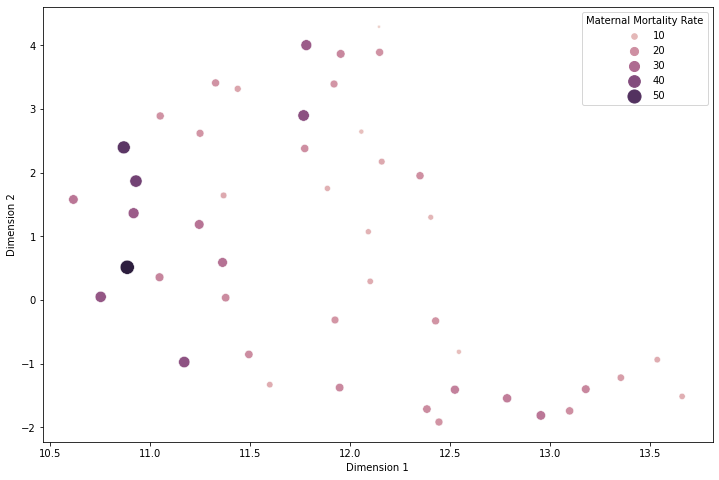

In [359]:
pd.options.mode.chained_assignment = None

merged_df['dimension_1'] = dimensions[:, 0]
merged_df['dimension_2'] = dimensions[:, 1]
sns.scatterplot(x = 'dimension_1', y = 'dimension_2', hue = 'maternal_mortality_rate', size = 'maternal_mortality_rate', sizes=(10, 200), data = merged_df);
plt.xlabel('Dimension 1');
plt.ylabel('Dimension 2');
plt.legend(title = 'Maternal Mortality Rate');